<a href="https://colab.research.google.com/github/gharashim/DL/blob/main/02_Machine_Learning_Basic_EX_05_MinMaxScale_Blood_Pressure_Multi_Variable_LR_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

>### [예제 5] Multi Variable Linear Regression (TensorFlow)

>### Load modules

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

if tf.__version__ >= '2.17.0':
    from tf_keras import optimizers
else:
    from tensorflow.keras import optimizers

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.26.4
TensorFlow Version :2.17.0
Matplotlib Version :3.7.1


> ### Input and Label

In [ ]:
#Input(AGE) and Labels(BP)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[118],[125],[130],[118],[126],[123],[120],[124],[130],[122],[125],[130],[127],[130],[130],[125.5],[130],[138]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal(()), dtype=tf.float32)

In [ ]:
# Min Max Scaler
x_input_org = x_input # 나중에 원본데이터 확인을 위해 백업
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \end{bmatrix}$
>### $W = \begin{bmatrix} w_{1} \\ w_{2} \\\end{bmatrix}$
>### $H(x) = XW + b$

In [ ]:
# Hypothesis
def Hypothesis(x):
  return tf.matmul(x, W) + B

>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [ ]:
def Cost():
  return tf.reduce_mean(tf.square(Hypothesis(x_input)-labels))

### 학습 (Training)

In [ ]:
%%time
# Parameter Set
epochs = 5000
learning_rate = 0.01
optimizer = optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs//20) == 0:
      print("[{:>6}] cost = {:>10.4}, W = [ {:>7.4} {:>7.4} ], B = {:>7.4}".format(cnt, cost_graph[cnt], W[0,0], W[1,0], B.numpy()))

  optimizer.minimize(Cost,[W, B])

[     0] cost =  1.579e+04, W = [ -0.4857    1.05 ], B =  0.3624
[   250] cost =      153.9, W = [    32.5   28.89 ], B =   92.73
[   500] cost =      65.73, W = [   24.79   20.31 ], B =   101.9
[   750] cost =      30.39, W = [   19.28   15.47 ], B =   107.6
[  1000] cost =      15.83, W = [   15.47   12.69 ], B =   111.3
[  1250] cost =      9.737, W = [   12.87   11.05 ], B =   113.7
[  1500] cost =      7.164, W = [   11.13   10.06 ], B =   115.2
[  1750] cost =      6.073, W = [   9.966   9.455 ], B =   116.2
[  2000] cost =      5.609, W = [   9.196   9.078 ], B =   116.8
[  2250] cost =      5.412, W = [   8.688   8.841 ], B =   117.2
[  2500] cost =      5.327, W = [   8.354    8.69 ], B =   117.5
[  2750] cost =      5.292, W = [   8.135   8.593 ], B =   117.7
[  3000] cost =      5.276, W = [   7.991   8.531 ], B =   117.8
[  3250] cost =       5.27, W = [   7.897   8.491 ], B =   117.9
[  3500] cost =      5.267, W = [   7.836   8.465 ], B =   117.9
[  3750] cost =      5.26

>### Hypothesis Test

In [ ]:
print("[ Hypothesis test ]")

H_x = Hypothesis(x_input)
for x,h,l in zip(x_input_org, H_x, labels):
  print("Age : {}, BMI : {:>7.4} => BP : {:>7.4} [label => {}]".format(x[0],x[1],h[0],l))

[ Hypothesis test ]
Age : 25.0, BMI :    22.0 => BP :   118.0 [label => [118.]]
Age : 25.0, BMI :    26.0 => BP :   122.2 [label => [125.]]
Age : 25.0, BMI :    30.0 => BP :   126.4 [label => [130.]]
Age : 35.0, BMI :    22.0 => BP :   119.6 [label => [118.]]
Age : 35.0, BMI :    26.0 => BP :   123.8 [label => [126.]]
Age : 35.0, BMI :    30.0 => BP :   128.0 [label => [123.]]
Age : 45.0, BMI :    22.0 => BP :   121.2 [label => [120.]]
Age : 45.0, BMI :    26.0 => BP :   125.4 [label => [124.]]
Age : 45.0, BMI :    30.0 => BP :   129.7 [label => [130.]]
Age : 55.0, BMI :    22.0 => BP :   122.8 [label => [122.]]
Age : 55.0, BMI :    26.0 => BP :   127.1 [label => [125.]]
Age : 55.0, BMI :    30.0 => BP :   131.3 [label => [130.]]
Age : 65.0, BMI :    22.0 => BP :   124.5 [label => [127.]]
Age : 65.0, BMI :    26.0 => BP :   128.7 [label => [130.]]
Age : 65.0, BMI :    30.0 => BP :   132.9 [label => [130.]]
Age : 73.0, BMI :    22.0 => BP :   125.7 [label => [125.5]]
Age : 73.0, BMI :  

In [ ]:
# predict
def predict(x):
  return Hypothesis((x-x_min)/(x_max-x_min))

In [ ]:
# predict
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = predict(x_test)
print("\n[ Prediction by specific data ]")
print("Age : {}, BMI : {} = > BP : {:>7.4}".format(x_test[0,0],x_test[0,1],H_x[0,0]))


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 = > BP :   125.2


>### Plotting

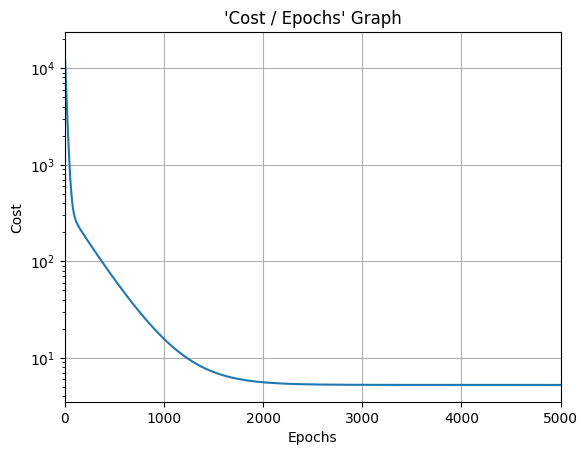

In [ ]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show()